<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_KMeanVsBERT_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: K-Mean Vs BERT Embedding

###AUTHOR: Sheida Talei

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [2]:
import transformers
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report





In [3]:


from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
# from transformers import glue_convert_examples_to_features, InputExample
from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# from kneed import KneeLocator
from sklearn import metrics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# !pip install --target=$nb_path kneed

In [ ]:
# from flair.embeddings import BertEmbeddings

In [ ]:
# from nltk import tokenize

# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [6]:
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
Y_train= X_and_Y.Label
X_train = X_and_Y.text

In [ ]:
# def preprocessing_for_bert(data):
#   input_ids = []
#   attention_masks = []
#   for row in data:
#     sents = tokenize.sent_tokenize(row)
#     print(sents)
#     for sent in sents:
#       encoded_sent = tokenizer.encode_plus(text=sent,
#                                           add_special_tokens=True,
#                                           max_length=MAX_LEN,
#                                           pad_to_max_length=True,
#                                           return_attention_mask=True,
#                                           truncation=True)
#       input_ids.append(encoded_sent.get('input_ids'))
#       attention_masks.append(encoded_sent.get('attention_mask'))
#   # Convert lists to tensors
#   input_ids = torch.tensor(input_ids)
#   attention_masks = torch.tensor(attention_masks)

#   return input_ids, attention_masks


# tokens_tensor, segments_tensor = preprocessing_for_bert(X_train)

In [ ]:
#Loading the model

# import os
# checkpoint_path = "/content/drive/MyDrive/Final/Bert1.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 2, output_hidden_states = True)
# # model = model = BertModel.from_pretrained('bert-base-multilingual-cased', output_hidden_states = True)
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')



In [ ]:
##DONT REMOVE

# model.compile(optimizer=optimizer, loss=loss, metrics=[ metric_accuracy])
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# model.load_weights(latest)
# model.load_weights(checkpoint_path)


In [7]:



model = SentenceTransformer('bert-base-multilingual-cased')
# model = SentenceTransformer('distiluse-base-multilingual-cased-v2')


Exception when trying to download https://sbert.net/models/bert-base-multilingual-cased.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/bert-base-multilingual-cased.zip not found. Try to create it from scratch
Try to create Transformer Model bert-base-multilingual-cased with mean pooling


In [ ]:
#Source: https://github.com/UKPLab/sentence-transformers
sentence_embeddings = model.encode(X_train)

In [ ]:
num_cluster = 15
kmean=KMeans(n_clusters=num_cluster)
kmean.fit(sentence_embeddings)
labels = kmean.labels_
silhoute = metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean')
print("silhouette_score is: ",silhoute)

In [ ]:
centroids = kmean.cluster_centers_

In [ ]:
#this functon calculates cos theta between two vectors
def similarity (vector_a, vector_b):
  ma = np.linalg.norm(vector_a)
  mb = np.linalg.norm(vector_b)
  sim = (np.matmul(vector_a,vector_b))/(ma * mb)
  return sim

In [ ]:
centroid_matrix = np.zeros((num_cluster,num_cluster))

In [ ]:
for i in range(num_cluster):
  for j in range(num_cluster):
    centroid_matrix[i][j] = similarity(centroids[i], centroids[j])

In [53]:
print(centroid_matrix)

[[0.99999988 0.83338082 0.83145893 ... 0.73712152 0.88469684 0.74333692]
 [0.83338082 1.         0.94365591 ... 0.70155156 0.9023174  0.78444451]
 [0.83145893 0.94365591 1.00000012 ... 0.73017174 0.89248157 0.763336  ]
 ...
 [0.73712152 0.70155156 0.73017174 ... 1.00000012 0.784343   0.708552  ]
 [0.88469684 0.9023174  0.89248157 ... 0.784343   1.         0.77749258]
 [0.74333692 0.78444451 0.763336   ... 0.708552   0.77749258 0.99999994]]


In [56]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(centroid_matrix, range(1,num_cluster+1), range(1,num_cluster+1))
plt.figure(figsize = (10,7))
# sn.color_palette("vlag", as_cmap=True)
plot = sn.heatmap(df_cm, annot=True, cmap="coolwarm")
plot.figure.savefig("/content/drive/MyDrive/Final/BERT_15.png")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd32d49d730> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd32d1c5c80> (for post_execute):


KeyboardInterrupt: ignored

/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


50   0.02875061


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


100   0.023654541


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


500   0.05095903


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


1000   0.110390015


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


2000   0.18164055


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


3000   0.2362266


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


4000   0.28025594


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


5000   0.31390056


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


6000   0.34178776


Text(0, 0.5, 'silhouette_score')

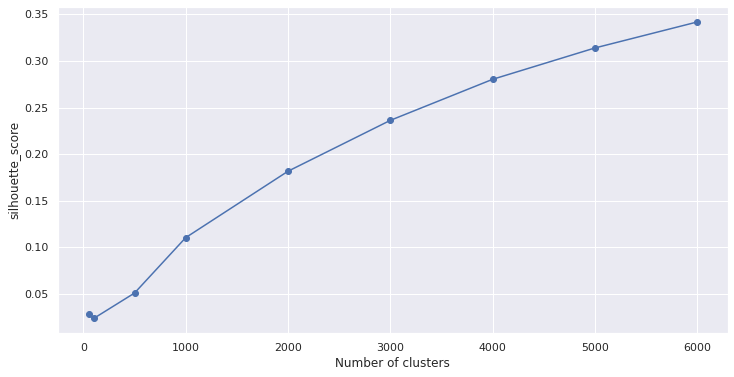

In [ ]:
SSE = []
clusterList = [50,100,500,1000,2000,3000,4000,5000,6000]
for cluster in clusterList:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(sentence_embeddings)
    # SSE.append(kmeans.inertia_)
    labels = kmeans.labels_
    a = metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean')
    SSE.append(a)
    # clusterList.append(cluster)
    print (cluster , " " , a)
    # cluster = cluster + 10

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')


In [ ]:
clusterList = [50,70,100,120,150,180,200,220,230,260,280,300,320,340,350,380,400,410,430,450,470,500]
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

In [ ]:
kl = KneeLocator(range(1, 50), SSE, curve="convex", direction="decreasing")
true_k = kl.elbow
print (true_k)


10


In [ ]:
true_k=10
kmean=KMeans(n_clusters=true_k)
kmean.fit(sentence_embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_assignment = kmean.labels_


In [ ]:
#https://theaidigest.in/how-to-cluster-text-documents-using-bert/
clustered_sentences = [[] for i in range(true_k)]
counter = 0
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if(len(clustered_sentences[cluster_id])<=10):
      clustered_sentences[cluster_id].append(X_train[sentence_id])


In [ ]:

for i, cluster in enumerate(clustered_sentences):
      print("Cluster ", i+1)
      print(cluster)
      print("")
      

Cluster  1
['دل اینکه هواتو منتظر همیشه مطمئن خوبی خوش تو وصله سختی جا', 'پای سفره ای زدن سر مردی بزرگ شد#شو فتاده شرم تو', 'میگرفت نمیومد تو محمود محرم صدا دهه خیلیا حاج مراسم', 'امریکا شه فردا نخواهیم کرد دلار خون تومن تهران باز کسا بره رحم پاک ابد بیاد بمونه کشتین فراموش سفارت نمیشه ترامپ دستاتون بایدن', 'بچه چندش ترین من قشنگ همینه حیوون', 'ایران نالایقه دختر به میداد خیلی بگیم نفر خدا میخوایم وقت نباید میگ', 'باز الانم بچرخم منشنت ول شب بیکاری همینجا زن بیام میکنم', 'موج خیلیا سوار بشن دایی', 'الهی😂😂 اخه میکنی بچه گیج', 'حجاب بیبی فاطمه کیر تو', 'نمی دونم اعتماده بچه ها']

Cluster  2
['جاری مسلمین توانست#توان داد#ده انقلاب مهدی اولیا نیز ادامه ان ولیعصر ای اله خامنه امام پذیرفت#پذیر قاسم قسم میباشد حضرت تاکید شاالله ولایت خداوند عزیز خورده اند حاج قبولی', 'روز عصر خاص اغاز اصل مشهد خواهد شد بهداشت الاول امامت شرایط الشریف نهم فرجه برگزار عجل دوشنبه اپیدمی مراسم ربیع حضرت کشور الله توجه برگزاری کرونا پروتکل مقدور تعالی مقدس امکان رعایت شهر', 'القیامه دعا زهرا🍃🌸🌹🌹🌹🌹 سالمکم حرب 🌹🌹🌹🍃🌸

In [ ]:
silhouette_score = metrics.silhouette_score(sentence_embeddings, cluster_assignment, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.013678591
